### iPyRAD analysis OCT2019
This dataset consists of 75 *Mycetomoellerius* cf. *zeteki* and 6 *M. zeteki* colonies from the Panama Canal Zone. Individual workers were used to represent a colony in these assemblies.<br><br> *M.* cf. *zeteki* on the left (A), and *M. zeteki* on the right (B)<br> 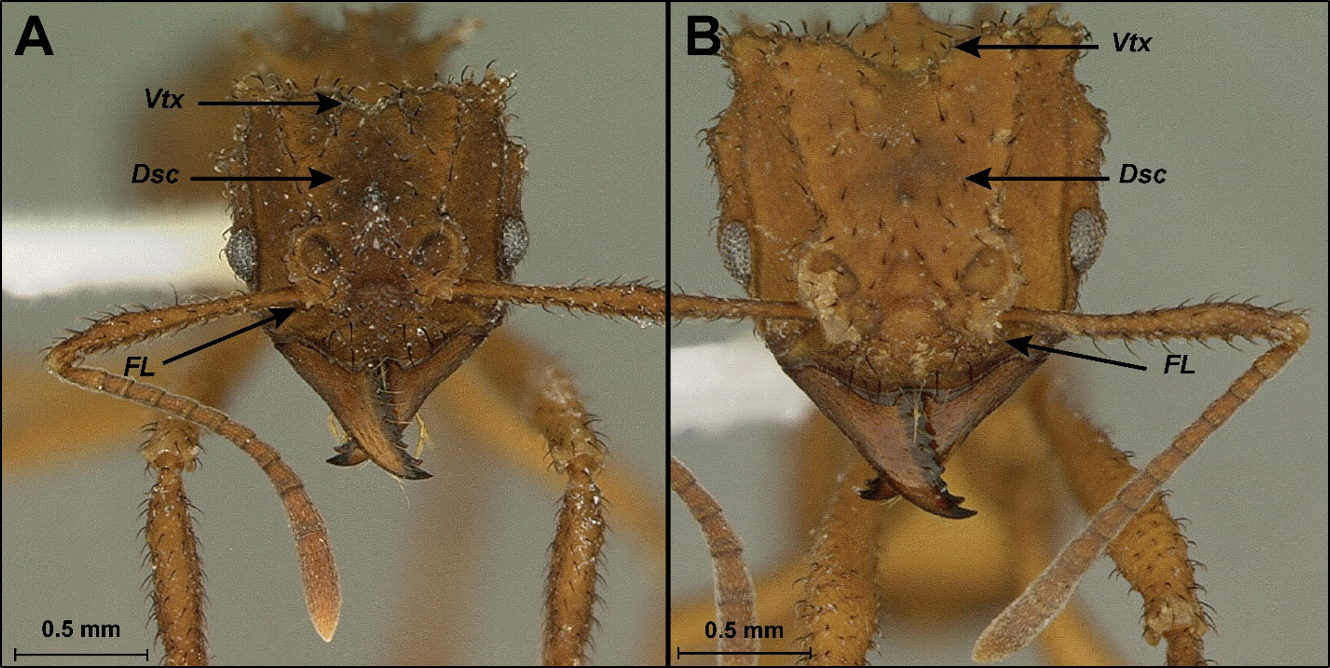 <br><br>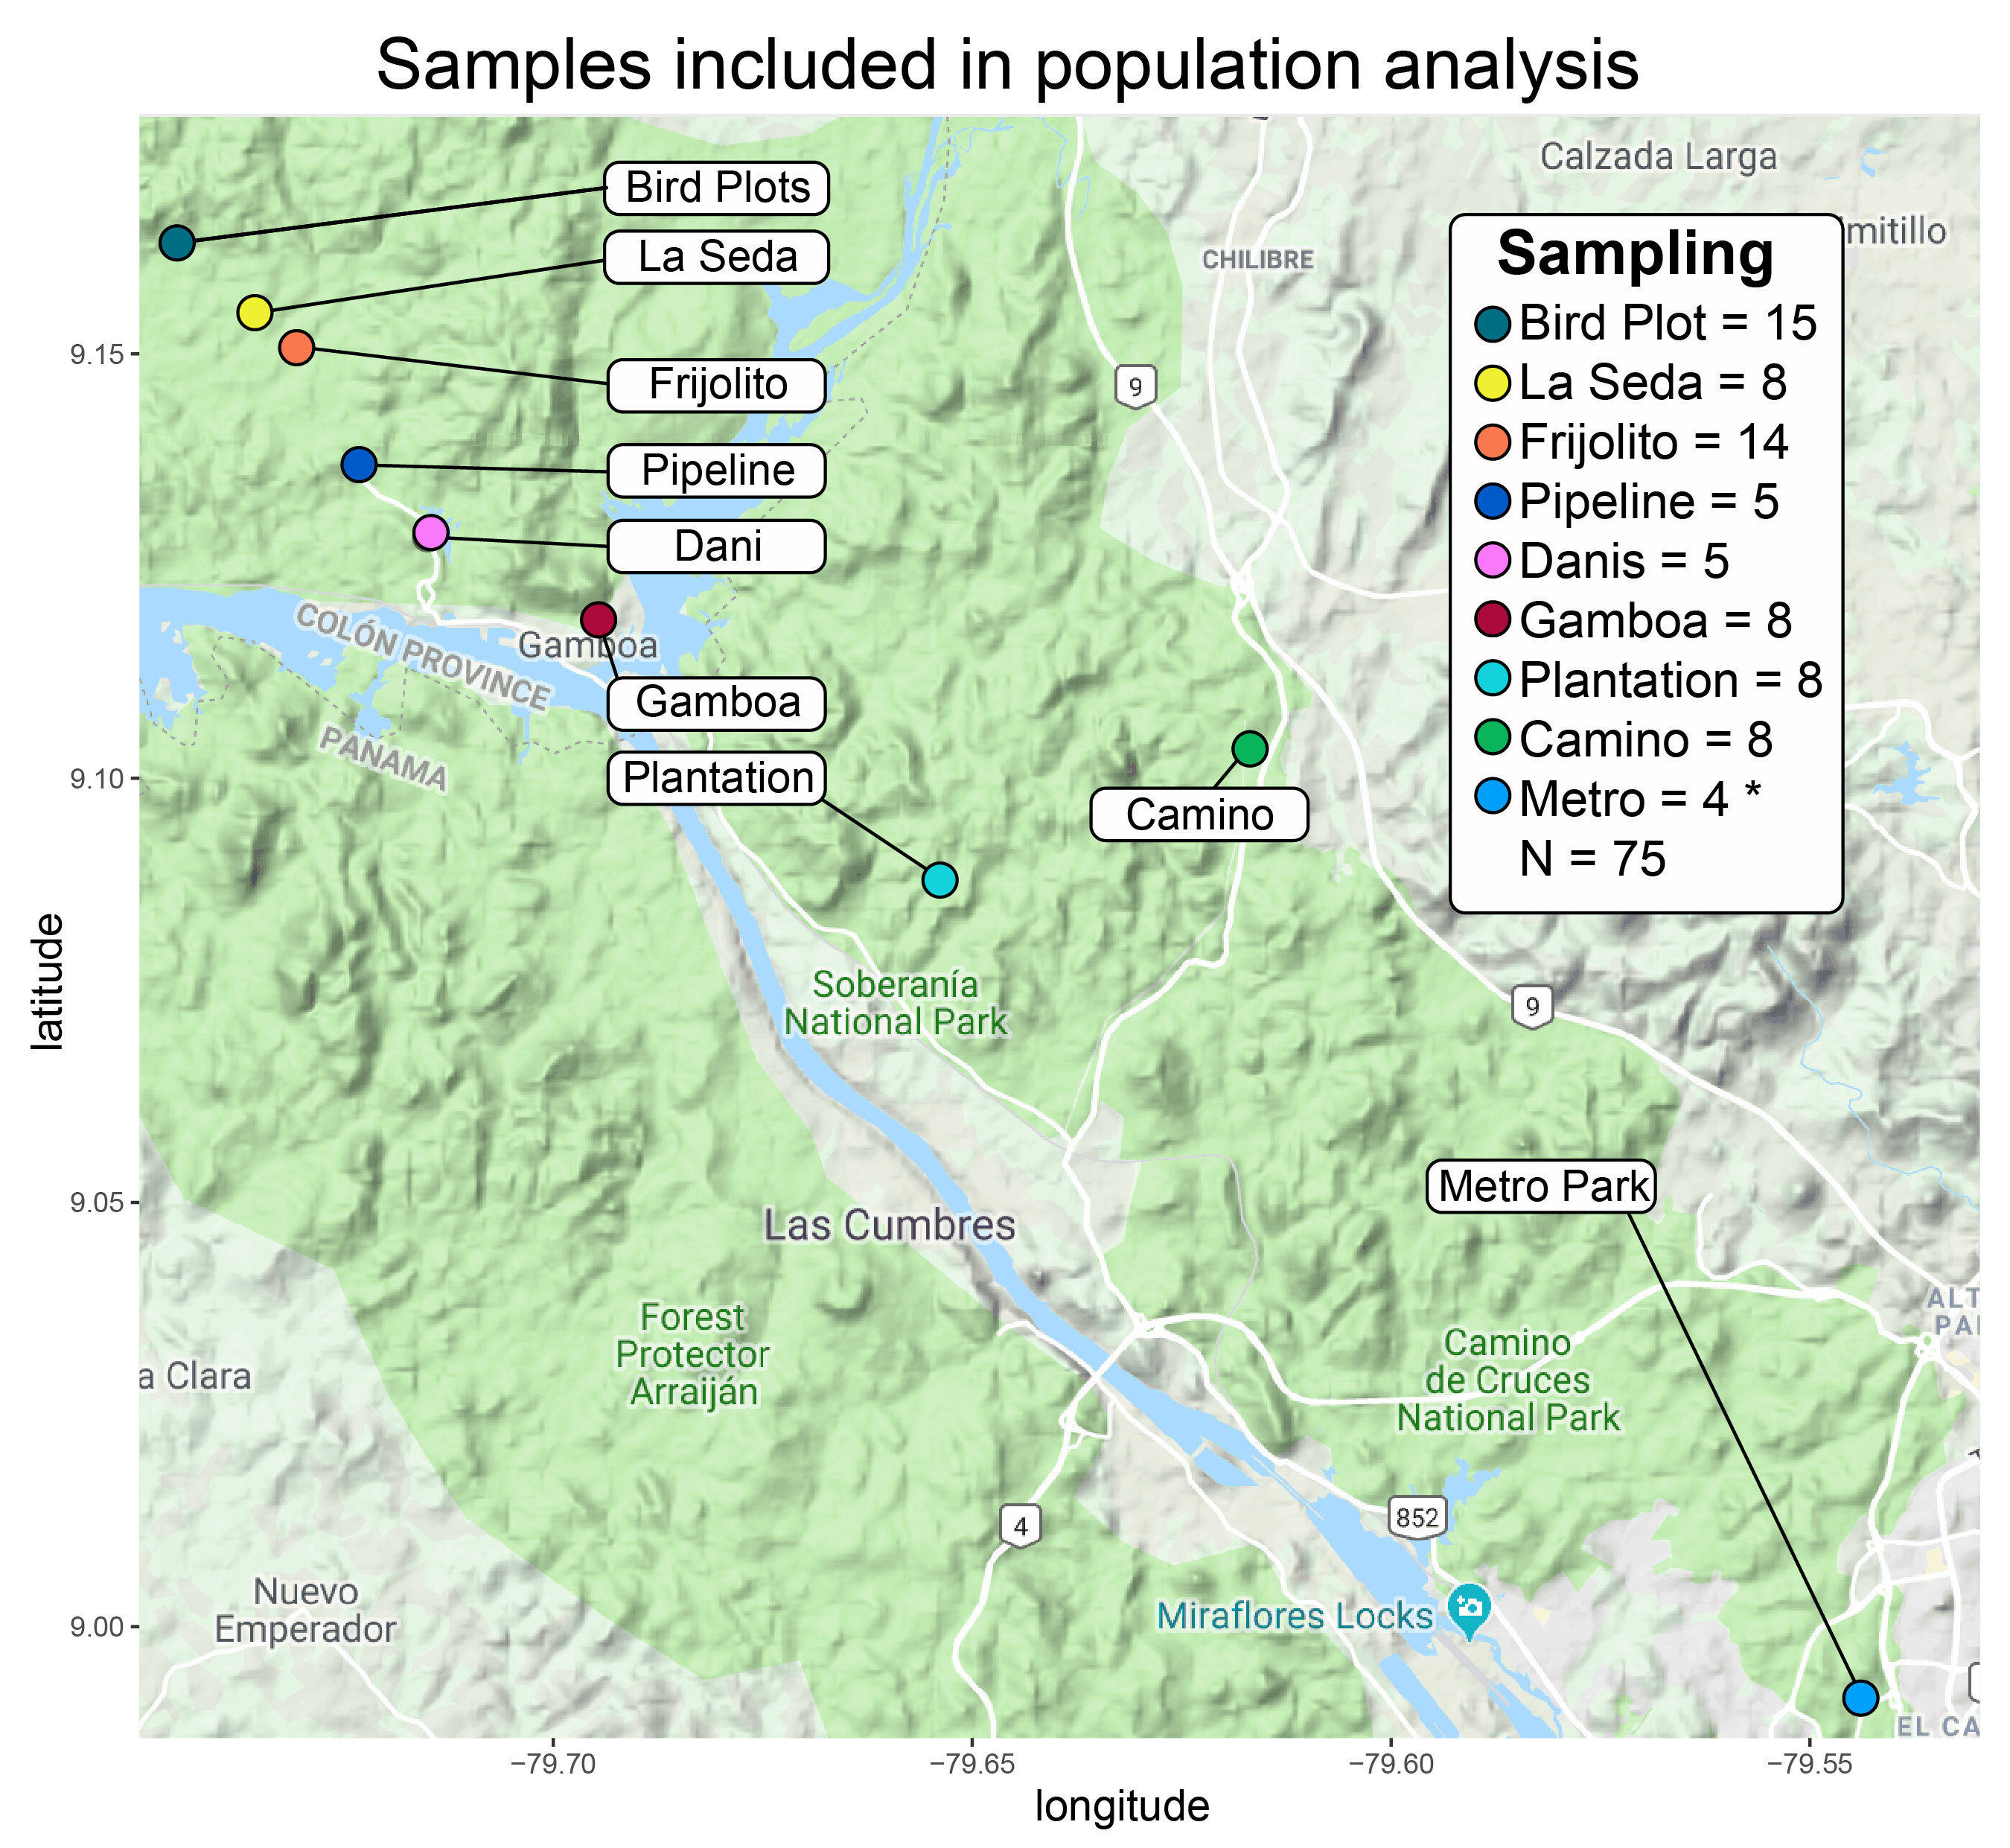<br><br>
six datasets of varying coverage (clust_threshold & max alelles) are generated for downstream analyses<br><br>
First we open our engines in a new notebook and then connect to it with `ipyparallel` here <br>
Then we import ipyrad.

In [1]:
import ipyparallel as ipp
print 'ipyparallel version is', ipp.__version__
trachy = ipp.Client(profile="trachy")
print 'trachy has',len(trachy), 'cores'

ipyparallel version is 6.2.4
trachy has 40 cores


In [2]:
#requires ipyrad
import ipyrad as ip
print 'iPyRAD version is', ip.__version__

iPyRAD version is 0.7.30


## re-load *.json file if necessary
If you need to reconnect or reopen an assembly after a HPC job has ended use:<br>
`ip.load.load_json("[ASSEMBLY NAME].json")` <br>
This is the one I normally use. Im not sure what the difference is

In [3]:
canal = ip.Assembly("canal")

New Assembly: canal


Since I have already demultiplexed my data in previous trial runs, I just used  CLI to subset my data into a new folder with 75 samples<br>
ex: `for f in list; do cp 'cat f' ./directory2/, done;` where lines in list are `./directory1/*CC666*.` (see example sample_list in dir)<br>
<br>
I am using relatively conservative parameters for these assemblies. The only paramter being altering is a the `phred_Qscore_offset` set at 43. This is equivelant to saying: no qscore lower than 30. And that the last 10 bases from each read  were trimed using the `trim_reads` parameter. These regions of each rad-frag sequenced were typically low quality based on the fastQC analyses ran prior to assembly. 
<br><br>
I will be branching this assembly into 3 seperate runs with the  `clust_threshold` = .8,.85,.9. For each of these assemblies there may be more than 2 alleles at any given rad-fragment, because of this I am setting the `max_allele` parameter to 2 and 4 for each previous assembly; for a total of 6 assemblies to analyize in down-stream analyses. <br><br>

In [4]:
canal.set_params('project_dir', '/fs/project/adams.1970/cardenas.61/2019_OCT') 
canal.set_params('sorted_fastq_path', './data/*R1_.fastq.*')
canal.set_params('assembly_method', 'denovo+reference')
canal.set_params('datatype', 'ddrad')
canal.set_params('reference_sequence', './Tzet_genomic.fna')
canal.set_params('restriction_overhang', 'TGCAG, CGG')
canal.set_params('max_low_qual_bases', '5')
canal.set_params('mindepth_statistical', '6')
canal.set_params('mindepth_majrule', '6')
canal.set_params('clust_threshold', '0.80')
canal.set_params('filter_adapters', '1')
canal.set_params('filter_min_trim_len', '30')
canal.set_params('max_Hs_consens','8,8')
canal.set_params('min_samples_locus', '16')
canal.set_params('max_SNPs_locus', '20, 30')
canal.set_params('trim_reads', '0, -10, 0, 0') #trim the last ten bases from R1s, 
#the reads here are generally poor based on the fastQC analyes
canal.set_params('output_formats', '*')
canal.set_params('phred_Qscore_offset', '43')
canal.get_params()

0   assembly_name               canal                                        
1   project_dir                 /fs/project/adams.1970/cardenas.61/2019_OCT  
2   raw_fastq_path                                                           
3   barcodes_path                                                            
4   sorted_fastq_path           ./data/*R1_.fastq.*                          
5   assembly_method             denovo+reference                             
6   reference_sequence          ./Tzet_genomic.fna                           
7   datatype                    ddrad                                        
8   restriction_overhang        ('TGCAG', 'CGG')                             
9   max_low_qual_bases          5                                            
10  phred_Qscore_offset         43                                           
11  mindepth_statistical        6                                            
12  mindepth_majrule            6                               

Load fastq files

In [5]:
canal.run("1",ipyclient=trachy, force = True)
canal.stats

Assembly: canal
[####################] 100%  loading reads         | 0:01:14 | s1 | 


state  reads_raw
BCI_CC269       1    2480813
BCI_CC270       1    2499790
BrPl_CC132      1    6260633
BrPl_CC137      1    4062703
BrPl_CC138      1    4023302
BrPl_CC139      1    5095450
BrPl_CC143      1    3684160
BrPl_CC144      1    6571882
BrPl_CC145      1    5981725
BrPl_CC146      1    5963334
BrPl_CC147      1    7148166
BrPl_CC191      1    2436631
BrPl_CC195      1     951467
BrPl_CC197      1    3279445
CmCr_CC235      1    1585601
CmCr_CC236      1    2238541
CmCr_CC237      1    2603005
CmCr_CC238      1    1541796
CmCr_CC239      1    1089790
CmCr_CC241      1    1457502
CmCr_CC243      1    1998058
CmCr_CC244      1    1677007
Dani_CC150      1    3204205
Dani_CC151      1    3590045
Dani_CC153      1    2912670
Dani_CC154      1    2419759
Dani_CC264      1    4069555
ElLl_CC188      1    2455221
Frij_CC223      1    1103400
Frij_CC224      1    2505321
Frij_CC225      1    2274816
Frij_CC226      1    1722610
Frij_CC227      1    2860004
Frij_CC228      1    2044614
Frij_CC229      1    3204205
Frij_CC230      1    3590045
Frij_CC231      1    2419759
Frij_CC232      1    2455221
Frij_CC234      1    2505321
Frij_CC261      1    4069555
Frij_CC262      1    2912670
Frij_CC267      1    1103400
Gamb_CC165      1    2274816
Gamb_CC166      1    1722610
Gamb_CC167      1    2860004
Gamb_CC168      1    2044614
Gamb_CC169      1    1737193
Gamb_CC170      1    1463261
Gamb_CC171      1    2574173
Gamb_CC173      1    5915634
LaSe_CC140      1    3310264
LaSe_CC142      1    1134721
LaSe_CC198      1    2794367
LaSe_CC216      1    3564104
LaSe_CC245      1    2995561
LaSe_CC250      1    2975286
LaSe_CC255      1    1601069
LaSe_CC260      1    2576534
Mend_CC271      1    1351415
Mend_CC272      1    1881763
Mend_CC273      1    2174821
Metr_CC181      1    6942674
Metr_CC183      1    4657311
Metr_CC254      1    6656322
Metr_CC265      1    3899962
Pipe_CC218      1    4998325
Pipe_CC219      1    4672060
Pipe_CC220      1    7019430
Pipe_CC221      1    3763495
Pipe_CC222      1    3009558
Plan_CC156      1    2287099
Plan_CC158      1    2442334
Plan_CC160      1    4856936
Plan_CC162      1    4138145
Plan_CC163      1    2553569
Plan_CC174      1    2787215
Plan_CC176      1    4210143
Plan_CC178      1    1955334
Plan_CC179      1    3783806
Plan_CC180      1    2176817

### branches start here here

set a branch for canal assembly after step 1 so we can come back if necessary

In [6]:
canal_s1=canal.branch("canal_s1")

create branch names representative of the parameters we are manipulating; here we are going to change the `clust_threshold` parameter AND max_allele parameter<br><br>
e.g., {assembly}{clustthreshold}______{max_alleles}= canal80_4

In [7]:
canal80_2=canal_s1.branch("canal80_2")

In [8]:
canal85_2=canal_s1.branch("canal85_2")

In [9]:
canal90_2=canal_s1.branch("canal90_2")

In [10]:
canal80_4=canal_s1.branch("canal80_4")

In [11]:
canal85_4=canal_s1.branch("canal85_4")

In [12]:
canal90_4=canal_s1.branch("canal90_4")

### set branch parameters here

In [13]:
#set clust_threshold here here
canal80_2.set_params('clust_threshold', '0.80')
canal85_2.set_params('clust_threshold', '0.85')
canal90_2.set_params('clust_threshold', '0.90')
canal80_4.set_params('clust_threshold', '0.80')
canal85_4.set_params('clust_threshold', '0.85')
canal90_4.set_params('clust_threshold', '0.90')
#set max_alleles here
canal80_2.set_params('max_alleles_consens', '2')
canal85_2.set_params('max_alleles_consens', '2')
canal90_2.set_params('max_alleles_consens', '2')
canal80_4.set_params('max_alleles_consens', '4')
canal85_4.set_params('max_alleles_consens', '4')
canal90_4.set_params('max_alleles_consens', '4')

**Step 2** uses the quality score recorded in the fastQ data files to filter low quality base calls. Sites with a score below a set value are changed into “N”s, and reads with more than the number of allowed “N”s are discarded. The threshold for inclusion is set with the `phred_Qscore_offset` parameter. An optional filter can be applied to remove adapters/primers (see `filter_adapters`), and there is an optional filter to clean up the edges of poor quality reads (see `edit_cutsites`). <br>
[ipyrad.readthedocs.io](https://ipyrad.readthedocs.io/en/latest/7-outline.html#filtering-editing-reads)

In [14]:
canal80_2.run("2",ipyclient=trachy, force = True)
canal85_2.run("2",ipyclient=trachy, force = True)
canal90_2.run("2",ipyclient=trachy, force = True)
canal80_4.run("2",ipyclient=trachy, force = True)
canal85_4.run("2",ipyclient=trachy, force = True)
canal90_4.run("2",ipyclient=trachy, force = True)

Assembly: canal80_2
[####################] 100%  processing reads      | 0:08:14 | s2 | 
Assembly: canal85_2
[####################] 100%  processing reads      | 0:08:16 | s2 | 
Assembly: canal90_2
[####################] 100%  processing reads      | 0:08:21 | s2 | 
Assembly: canal80_4
[####################] 100%  processing reads      | 0:08:18 | s2 | 
Assembly: canal85_4
[####################] 100%  processing reads      | 0:08:17 | s2 | 
Assembly: canal90_4
[####################] 100%  processing reads      | 0:08:21 | s2 | 


**Step 3** first dereplicates the sequences from step 2, recording the number of times each unique read is observed. If the data are paired-end, it then uses vsearch to merge paired reads which overlap. The resulting data are then either de novo clustered (using vsearch) or mapped to a reference genome (using bwa and bedtools), depending on the selected assembly method. In either case, reads are matched together on the basis of sequence similarity and the resulting clusters are aligned using muscle.
<br>
[ipyrad.readthedocs.io](https://ipyrad.readthedocs.io/en/latest/7-outline.html#clustering-mapping-reads-within-samples-and-alignment)

In [ ]:
canal80_2.run("3",ipyclient=trachy, force = True)
canal85_2.run("3",ipyclient=trachy, force = True)
canal90_2.run("3",ipyclient=trachy, force = True)
canal80_4.run("3",ipyclient=trachy, force = True)
canal85_4.run("3",ipyclient=trachy, force = True)
canal90_4.run("3",ipyclient=trachy, force = True)

Assembly: canal80_2
[####################] 100%  indexing reference    | 0:04:33 | s3 | 
[####################] 100%  dereplicating         | 0:00:21 | s3 | 
[####################] 100%  mapping               | 0:14:34 | s3 | 
[####################] 100%  clustering            | 0:13:10 | s3 | 
[####################] 100%  building clusters     | 0:00:37 | s3 | 
[####################] 100%  fetch mapped reads    | 0:00:32 | s3 | 
[####################] 100%  chunking              | 0:00:07 | s3 | 
[####################] 100%  aligning              | 0:56:10 | s3 | 
[####################] 100%  concatenating         | 0:00:17 | s3 | 
Assembly: canal85_2
[####################] 100%  indexing reference    | 0:04:25 | s3 | 
[####################] 100%  dereplicating         | 0:00:20 | s3 | 
[####################] 100%  mapping               | 0:15:39 | s3 | 
[####################] 100%  clustering            | 0:21:44 | s3 | 
[####################] 100%  building clusters     | 0:00:41 | 

The cat sat on my laptop and closed this connection overnight, so there is not all the output from step 3.

**Step 4** jointly estimates sequencing error rate and heterozygosity based on counts of site patterns across clustered reads. These estimates are used in step5 for consensus base calling. If the max_alleles_consens is set to 1 (haploid) then heterozygosity is fixed to 0 and only error rate is estimated. For all other settings of max_alleles_consens a diploid model is used (i.e., two alleles are expected to occur equally).
<br>
[ipyrad.readthedocs.io](https://ipyrad.readthedocs.io/en/latest/7-outline.html#joint-estimation-of-heterozygosity-and-error-rate)

In [18]:
canal80_2.run("4",ipyclient=trachy, force = True)
canal85_2.run("4",ipyclient=trachy, force = True)
canal90_2.run("4",ipyclient=trachy, force = True)
canal80_4.run("4",ipyclient=trachy, force = True)
canal85_4.run("4",ipyclient=trachy, force = True)
canal90_4.run("4",ipyclient=trachy, force = True)

Assembly: canal80_2
[####################] 100%  inferring [H, E]      | 0:07:17 | s4 | 
Assembly: canal85_2
[####################] 100%  inferring [H, E]      | 0:06:57 | s4 | 
Assembly: canal90_2
[####################] 100%  inferring [H, E]      | 0:06:32 | s4 | 
Assembly: canal80_4
[####################] 100%  inferring [H, E]      | 0:07:17 | s4 | 
Assembly: canal85_4
[####################] 100%  inferring [H, E]      | 0:07:00 | s4 | 
Assembly: canal90_4
[####################] 100%  inferring [H, E]      | 0:06:29 | s4 | 


**Step 5** estimates consensus allele sequences from clustered reads given the estimated parameters from step 4 and a binomial model. During this step we filter for maximum number of undetermined sites (Ns) per locus `max_Ns_consens`. The number of alleles at each locus is recorded, but a filter for max_alleles is not applied until step7. Read depth information is also stored at this step for the VCF output in step 7.
<br>
[ipyrad.readthedocs.io](https://ipyrad.readthedocs.io/en/latest/7-outline.html#consensus-base-calling-and-filtering)

In [22]:
canal80_2.run("5",ipyclient=trachy, force = True)
canal85_2.run("5",ipyclient=trachy, force = True)
canal90_2.run("5",ipyclient=trachy, force = True)
canal80_4.run("5",ipyclient=trachy, force = True)
canal85_4.run("5",ipyclient=trachy, force = True)
canal90_4.run("5",ipyclient=trachy, force = True)

Assembly: canal80_2
[####################] 100%  calculating depths    | 0:00:10 | s5 | 
[####################] 100%  chunking clusters     | 0:00:11 | s5 | 
[####################] 100%  consens calling       | 0:07:15 | s5 | 
Assembly: canal85_2
[####################] 100%  calculating depths    | 0:00:11 | s5 | 
[####################] 100%  chunking clusters     | 0:00:13 | s5 | 
[####################] 100%  consens calling       | 0:07:24 | s5 | 
Assembly: canal90_2
[####################] 100%  calculating depths    | 0:00:12 | s5 | 
[####################] 100%  chunking clusters     | 0:00:13 | s5 | 
[####################] 100%  consens calling       | 0:07:25 | s5 | 
Assembly: canal80_4
[####################] 100%  calculating depths    | 0:00:10 | s5 | 
[####################] 100%  chunking clusters     | 0:00:11 | s5 | 
[####################] 100%  consens calling       | 0:07:17 | s5 | 
Assembly: canal85_4
[####################] 100%  calculating depths    | 0:00:11 | s5 | 
[##

**Step 6** clusters consensus sequences across Samples using the same assembly method as in step 3. One allele is randomly sampled before clustering so that ambiguous characters have a lesser effect on clustering, but the resulting data retain information for heterozygotes. The clustered sequences are then aligned using muscle.<br>
[ipyrad.readthedocs.io](https://ipyrad.readthedocs.io/en/latest/7-outline.html#clustering-mapping-reads-among-samples-and-alignment)

In [23]:
canal80_2.run("6",ipyclient=trachy, force = True)
canal85_2.run("6",ipyclient=trachy, force = True)
canal90_2.run("6",ipyclient=trachy, force = True)
canal80_4.run("6",ipyclient=trachy, force = True)
canal85_4.run("6",ipyclient=trachy, force = True)
canal90_4.run("6",ipyclient=trachy, force = True)

Assembly: canal80_2
[####################] 100%  concat/shuffle input  | 0:00:07 | s6 | 
[####################] 100%  clustering across     | 0:00:25 | s6 | 
[####################] 100%  building clusters     | 0:00:06 | s6 | 
[####################] 100%  aligning clusters     | 0:01:16 | s6 | 
[####################] 100%  database indels       | 0:00:20 | s6 | 
[####################] 100%  indexing clusters     | 0:00:23 | s6 | 
[####################] 100%  building database     | 0:05:16 | s6 | 
Assembly: canal85_2
[####################] 100%  concat/shuffle input  | 0:00:07 | s6 | 
[####################] 100%  clustering across     | 0:00:30 | s6 | 
[####################] 100%  building clusters     | 0:00:06 | s6 | 
[####################] 100%  aligning clusters     | 0:01:18 | s6 | 
[####################] 100%  database indels       | 0:00:18 | s6 | 
[####################] 100%  indexing clusters     | 0:00:24 | s6 | 
[####################] 100%  building database     | 0:05:56 | 

#### Second Branch
Here we create a second branch so we can check the coverage levels as well based on the `min_samples_locus` coverage. It is currently set at 16. Adjusting this is not entirely necessary because of our downstream analyses, but we will leave this hear just in case<br>
`mins_samples_locus` only effects step 7<br><br>
e.g., {assembly}{clustthreshold}______{max_alleles}______{minsample_locus} = canal80_4_16

In [31]:
canal80_2_s6=canal80_2.branch("canal80_2_s6")
canal85_2_s6=canal85_2.branch("canal85_2_s6")
canal90_2_s6=canal90_2.branch("canal90_2_s6")
canal80_4_s6=canal80_4.branch("canal80_4_s6")
canal85_4_s6=canal85_4.branch("canal85_4_s6")
canal90_4_s6=canal90_4.branch("canal90_4_s6")

**Step 7** applies filters to the final alignments and saves the final data in a number of possible output formats. This step is most often repeated at several different settings for the parameter 21. min_samples_locus to create different assemblies with different proportions of missing data (see branching_workflow_).<br>
[ipyrad.readthedocs.io](https://ipyrad.readthedocs.io/en/latest/7-outline.html#filtering-and-formatting-output-files)<br>
inorder to make the vcf file, we need the linux `sort` function to have a tempdir to work with. We write this before running step 7


In [32]:
! mkdir $TMPDIR #! calls linux CLI from python 

In [33]:
canal80_2.run("7",ipyclient=trachy, force = True)
canal85_2.run("7",ipyclient=trachy, force = True)
canal90_2.run("7",ipyclient=trachy, force = True)
canal80_4.run("7",ipyclient=trachy, force = True)
canal85_4.run("7",ipyclient=trachy, force = True)
canal90_4.run("7",ipyclient=trachy, force = True)

Assembly: canal80_2
[####################] 100%  filtering loci        | 0:00:22 | s7 | 
[####################] 100%  building loci/stats   | 0:00:09 | s7 | 
[####################] 100%  building alleles      | 0:00:16 | s7 | 
[####################] 100%  building vcf file     | 0:00:15 | s7 | 
[####################] 100%  writing vcf file      | 0:00:00 | s7 | 
[####################] 100%  building arrays       | 0:00:08 | s7 | 
[####################] 100%  writing outfiles      | 0:00:08 | s7 | 
Outfiles written to: /fs/project/adams.1970/cardenas.61/2019_OCT/canal80_2_outfiles

Assembly: canal85_2
[####################] 100%  filtering loci        | 0:00:13 | s7 | 
[####################] 100%  building loci/stats   | 0:00:09 | s7 | 
[####################] 100%  building alleles      | 0:00:17 | s7 | 
[####################] 100%  building vcf file     | 0:00:13 | s7 | 
[####################] 100%  writing vcf file      | 0:00:00 | s7 | 
[####################] 100%  building arrays   

standard ipyrad output on CLI<br>
just the first 15 lines. To see entire output, replace `head -n16` with `cat`

In [40]:
! head -n16 canal80_2_outfiles/canal80_2_stats.txt



## The number of loci caught by each filter.
## ipyrad API location: [assembly].stats_dfs.s7_filters

                            total_filters  applied_order  retained_loci
total_prefiltered_loci              42433              0          42433
filtered_by_rm_duplicates            1403           1403          41030
filtered_by_max_indels                797            797          40233
filtered_by_max_snps                  563            321          39912
filtered_by_max_shared_het            214            140          39772
filtered_by_min_sample              29858          29365          10407
filtered_by_max_alleles              2489            906           9501
total_filtered_loci                  9501              0           9501




In [41]:
! head -n16 canal80_4_outfiles/*.txt



## The number of loci caught by each filter.
## ipyrad API location: [assembly].stats_dfs.s7_filters

                            total_filters  applied_order  retained_loci
total_prefiltered_loci              42433              0          42433
filtered_by_rm_duplicates            1403           1403          41030
filtered_by_max_indels                797            797          40233
filtered_by_max_snps                  563            321          39912
filtered_by_max_shared_het            214            140          39772
filtered_by_min_sample              29858          29365          10407
filtered_by_max_alleles               183             69          10338
total_filtered_loci                 10338              0          10338




In [42]:
! head -n16 canal85_2_outfiles/*.txt



## The number of loci caught by each filter.
## ipyrad API location: [assembly].stats_dfs.s7_filters

                            total_filters  applied_order  retained_loci
total_prefiltered_loci              44931              0          44931
filtered_by_rm_duplicates            2283           2283          42648
filtered_by_max_indels                567            567          42081
filtered_by_max_snps                  400            150          41931
filtered_by_max_shared_het            236            151          41780
filtered_by_min_sample              31958          31123          10657
filtered_by_max_alleles              2685            975           9682
total_filtered_loci                  9682              0           9682




In [43]:
! head -n16 canal85_4_outfiles/*.txt



## The number of loci caught by each filter.
## ipyrad API location: [assembly].stats_dfs.s7_filters

                            total_filters  applied_order  retained_loci
total_prefiltered_loci              44931              0          44931
filtered_by_rm_duplicates            2283           2283          42648
filtered_by_max_indels                567            567          42081
filtered_by_max_snps                  400            150          41931
filtered_by_max_shared_het            236            151          41780
filtered_by_min_sample              31958          31123          10657
filtered_by_max_alleles               184             67          10590
total_filtered_loci                 10590              0          10590




In [44]:
! head -n16 canal90_2_outfiles/*.txt



## The number of loci caught by each filter.
## ipyrad API location: [assembly].stats_dfs.s7_filters

                            total_filters  applied_order  retained_loci
total_prefiltered_loci              50396              0          50396
filtered_by_rm_duplicates            3310           3310          47086
filtered_by_max_indels                255            255          46831
filtered_by_max_snps                  267             20          46811
filtered_by_max_shared_het            272            206          46605
filtered_by_min_sample              36939          35454          11151
filtered_by_max_alleles              3211           1061          10090
total_filtered_loci                 10090              0          10090




In [45]:
! head -n16 canal90_4_outfiles/*.txt



## The number of loci caught by each filter.
## ipyrad API location: [assembly].stats_dfs.s7_filters

                            total_filters  applied_order  retained_loci
total_prefiltered_loci              50396              0          50396
filtered_by_rm_duplicates            3310           3310          47086
filtered_by_max_indels                255            255          46831
filtered_by_max_snps                  267             20          46811
filtered_by_max_shared_het            272            206          46605
filtered_by_min_sample              36939          35454          11151
filtered_by_max_alleles               208             79          11072
total_filtered_loci                 11072              0          11072




### Total output for downstream analysis: 
A total of 6 datsets to analyize. That is, where `max_alleles` is set at 2 and 4 for each cluster threshold of 80%,85%,&90%. <br><br>
**FINAL DATASETS**<br>
canal80-- cluster threshold of 80%<br>
    **canal80_2** -- max alleles 2<br>
    **canal80_4** -- max alleles 4<br><br>
canal85-- cluster threshold of 85%<br>
    **canal85_2** -- max alleles 2<br>
    **canal85_4** -- max alleles 4<br><br>
canal90-- cluster threshold of 90%<br>
    **canal90_2** -- max alleles 2<br>
    **canal90_4** -- max alleles 4<br><br>